In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# Combine the separate prediction results to one result file
# load the data
thread_0 = pd.read_csv("0-test_batch_results-BindMHC2.csv")
thread_1 = pd.read_csv("1-test_batch_results-BindMHC2.csv")
thread_2 = pd.read_csv("2-test_batch_results-BindMHC2.csv")
thread_3 = pd.read_csv("3-test_batch_results-BindMHC2.csv")
batch_2 = pd.read_csv("test_batch_2_results-BindMHC2.csv")

# check for overlap (we want none)
check_overlap = set(thread_0['Peptides']) & set(thread_1['Peptides']) & set(thread_2['Peptides']) & set(thread_2['Peptides']) & set(batch_2['Peptides'])
#print(check_overlap)
# combine the datasets
batch_1 = pd.concat([thread_0, thread_1, thread_2, thread_3, batch_2])
batch_1 = batch_1.reset_index(drop=True)
batch_1.to_csv("batch_0-80_results-BindMHC2.csv", index=False)

In [74]:
# Combine the different prediction result batches
batch_1 = pd.read_csv("/mnt/data/Test_Project/batch_0-80_results-BindMHC2.csv")
batch_2 = pd.read_csv("/mnt/data/Test_Project/batch_80-120_results-BindMHC2.csv")
batch_3 = pd.read_csv("/mnt/data/Test_Project/batch_120-200_results-BindMHC2.csv")
complete = pd.concat([batch_1, batch_2, batch_3])
complete = complete.reset_index(drop=True)
print(complete)

     Peptides  netmhciipan_el_HLA_DRB1_01_01  netmhciipan_el_HLA_DRB1_03_01  \
0      115680                          20.46                           7.54   
1      115759                          71.07                          47.38   
2      115809                        5221.76                         881.60   
3      115843                         207.18                          19.53   
4      115867                          94.76                          99.07   
..        ...                            ...                            ...   
195    221987                          98.12                          96.96   
196    222004                          26.55                           1.12   
197    222023                          53.00                          61.00   
198    222044                          18.31                          16.15   
199    222065                          91.53                          71.07   

     netmhciipan_el_HLA_DRB1_04_01  netmhciipan_el_

In [77]:
check_overlap = set(batch_1['Peptides']) & set(batch_2['Peptides']) & set(batch_3['Peptides'])
print(check_overlap)

set()


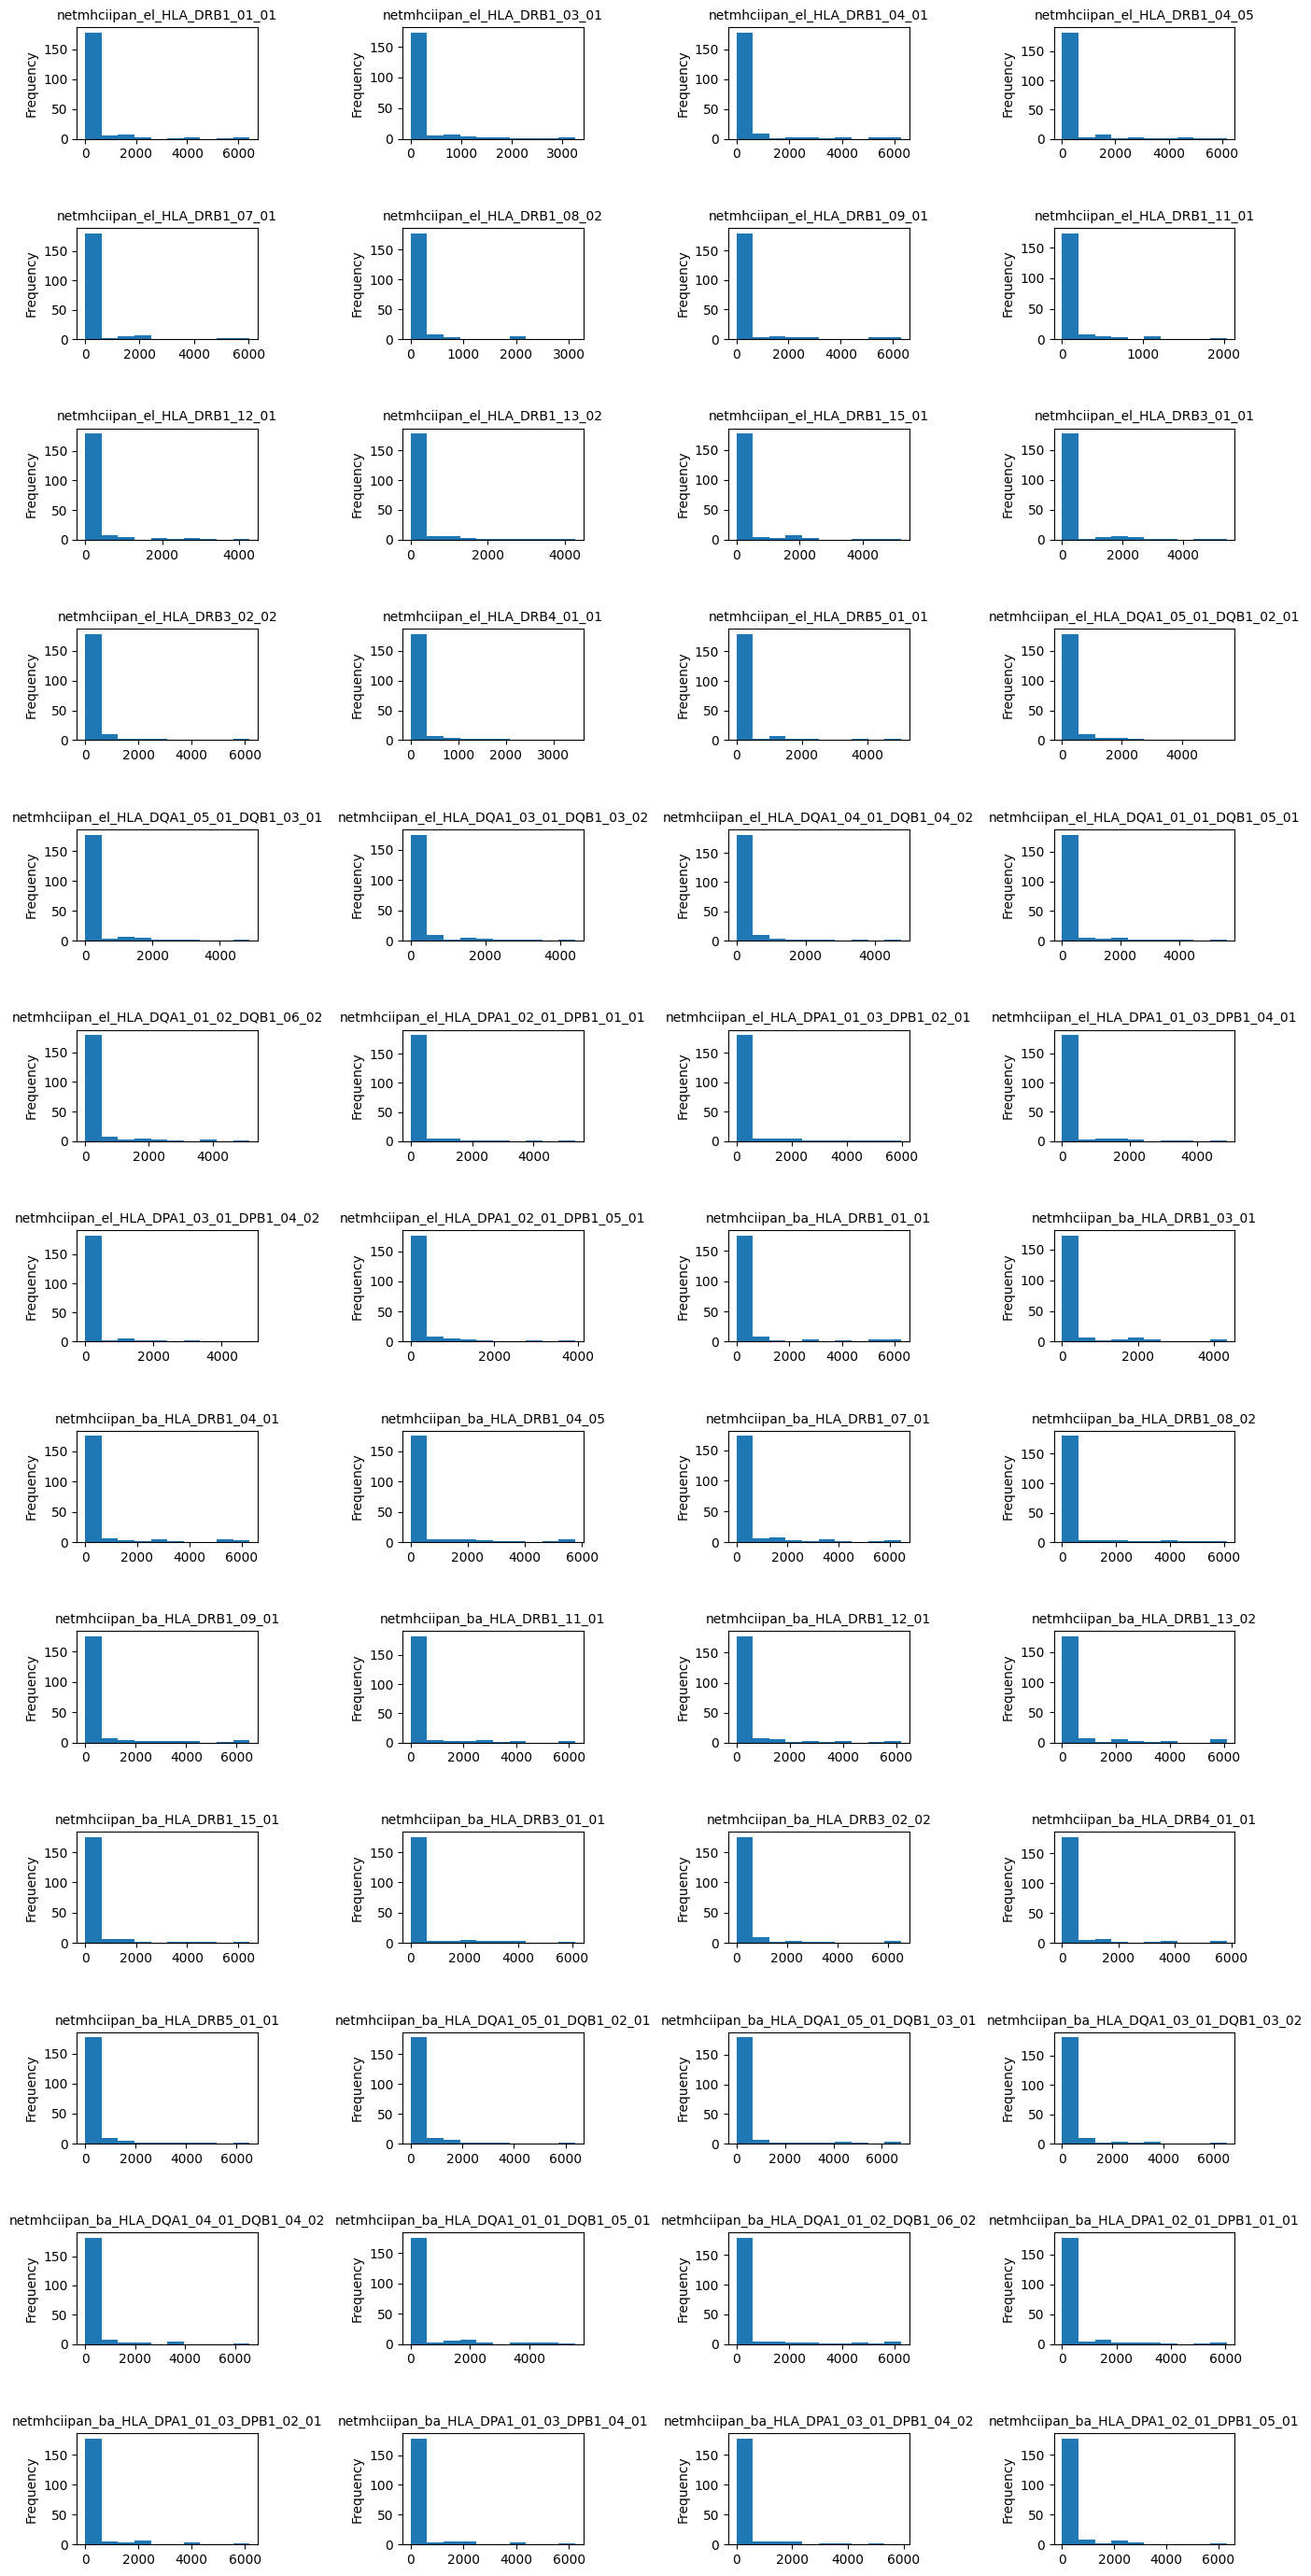

In [84]:
# Plot Histogram of adjusted rank values for each allele
alleles = list(complete.columns)
alleles = alleles[1:len(alleles)]

column = 1
plt.figure(figsize=(16,35))
plt.subplots_adjust(wspace=0.8, hspace=0.8)
for allele in alleles:
    plt.subplot(13, 4, column)
    complete[allele].plot.hist()
    plt.title(allele, fontsize=10)
    column += 1
  